# IMPORT COVID MOBILITY DATA, MASK TENDANCY DATA, 2020 ELECTION RESULTS - ALL BY COUNTY

The next steps are:

(1) to generate a folium map of the mobility results by county (after the data is smoothed), with a sliding timescale

(2) develop a machine learning algorithm to attempt to either predict election voting stats by county with mask tendancy data, or the vice versa.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import json 
from shapely.geometry import Polygon, mapping
import geopandas as gpd
from folium.plugins import TimeSliderChoropleth
import numpy as np 

##### RESTATING FIPS CODES TO HAVE FIVE DIGITS
def set_id(fips):
    '''Modify FIPS code to match GeoJSON property'''
    if len(fips) <= 4:
        return ''.join(['0', fips])
    else:
        return fips #''.join(['0500000US', fips])

##### RESTATING FIPS CODES TO MATCH GEOJSON PROPERTIES
def set_id_geo(fips):
    '''Modify FIPS code to match GeoJSON property'''
    #if fips == None:
    #    return None
    if len(fips) <= 4:
        return ''.join(['0500000US0', fips])
    else:
        return ''.join(['0500000US', fips])
    
    
### COVID MOBILITY DATA PER US COUNTY 
PATH = '../covid19mobility_report.csv'
dfcovid = pd.read_csv(PATH)  #, names = headers
dfcovid["date"] = pd.to_datetime(dfcovid["date"])
dfunitedstates = dfcovid[dfcovid["country_region"]=="United States"]
dfunitedstates['census_fips_code'] = dfunitedstates['census_fips_code'].astype(str)
dfunitedstates['census_fips_code'] = dfunitedstates['census_fips_code'].map(lambda x: x.lstrip('+-').rstrip('.0'))
dfunitedstates['census_fips_code'] = dfunitedstates['census_fips_code'].apply(set_id)


### HOW EACH COUNTY VOTED IN 2020 ELECTION
PATH_voting = './datasets/2020_USCounty_Voting.csv'
dfvoting = pd.read_csv(PATH_voting)  
dfvoting['party'] = np.logical_or(dfvoting['votes_gop'], dfvoting['votes_dem'])
dfvoting['county_fips'] = dfvoting['county_fips'].astype(str)
dfvoting['county_fips'] = dfvoting['county_fips'].apply(set_id)
dfvoting['GEO_ID'] = dfvoting['county_fips'].apply(set_id_geo)

### MASK TENDANCY PER COUNTY
PATH_masks = './datasets/covid19_nyt_maskusebycounty.csv'
dfmasks = pd.read_csv(PATH_masks) 
dfmasks['county_fips_code'] = dfmasks['county_fips_code'].astype(str)
dfmasks['county_fips_code'] = dfmasks['county_fips_code'].apply(set_id)
dfmasks = dfmasks.rename(columns = {"county_fips_code": "county_fips"})

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


# MOBILITY ANALYSIS (TO MAKE FOLIUM)

In [4]:
### SPECIFY NEW YORK  & BOROUGHS

places=pd.DataFrame(dfunitedstates["place_id"].value_counts())
places.reset_index(inplace=True)
places = places.rename(columns = {'index':'place_id', "place_id":"COUNT" })
places_indices = pd.DataFrame(places["place_id"].iloc[:2800])

dfunitedstates = dfunitedstates[dfunitedstates.place_id.isin(places_indices.place_id)]
nydf=dfunitedstates[dfunitedstates["sub_region_1"]=="New York"]

fipsids = pd.DataFrame(nydf["census_fips_code"].value_counts())
fipsids.reset_index(inplace=True)
fipsids = fipsids.rename(columns = {'index':'census_fips_code', "census_fips_code":"COUNT" })

NYC_df=nydf[nydf["sub_region_2"]=="New York County"]
NYC_df=NYC_df.sort_values(by='date')


Kings_df=nydf[nydf["sub_region_2"]=="Kings County"]
Kings_df=Kings_df.sort_values(by='date')

Queens_df=nydf[nydf["sub_region_2"]=="Queens County"]
Queens_df=Queens_df.sort_values(by='date')

Bronx_df=nydf[nydf["sub_region_2"]=="Bronx County"]
Bronx_df=Bronx_df.sort_values(by='date')

Richmond_df=nydf[nydf["sub_region_2"]=="Richmond County"]
Richmond_df=Richmond_df.sort_values(by='date')

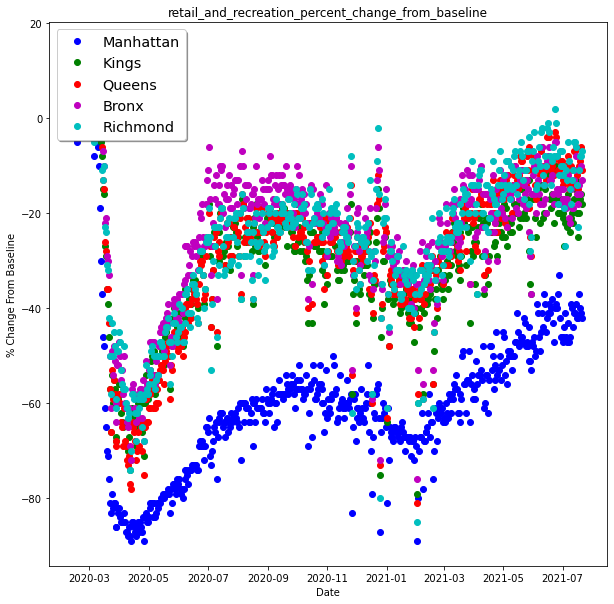

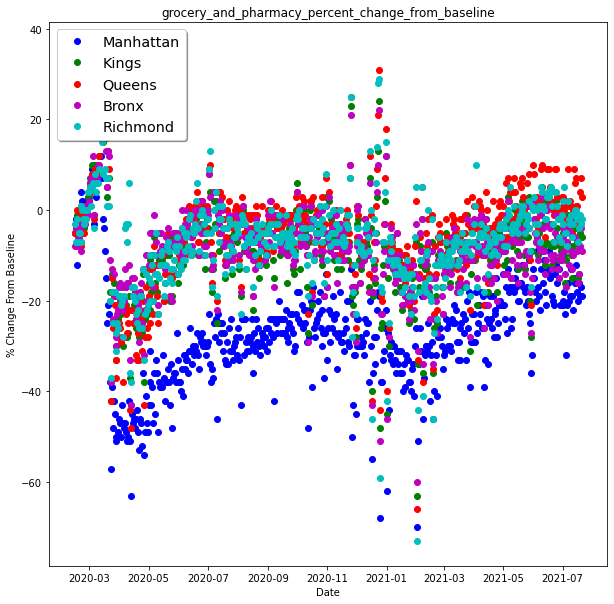

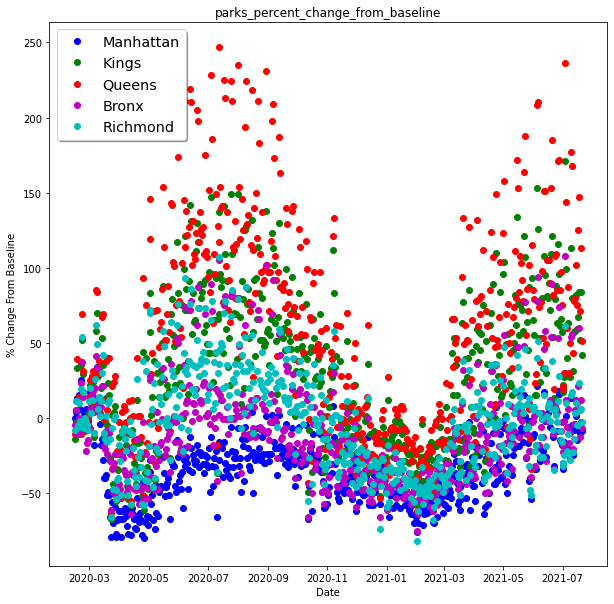

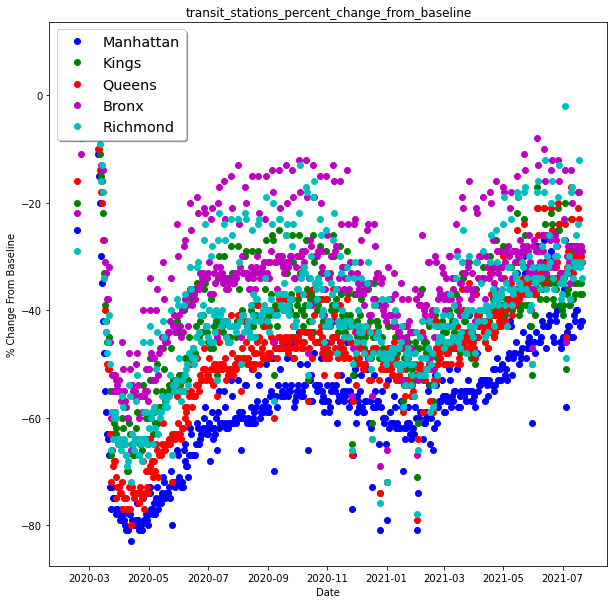

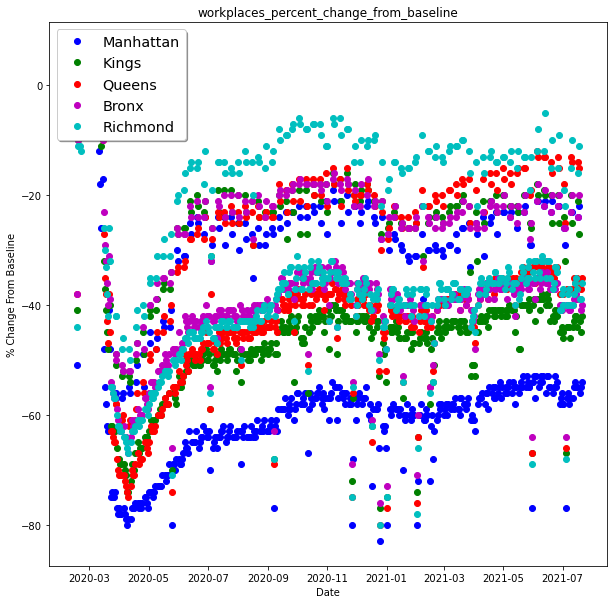

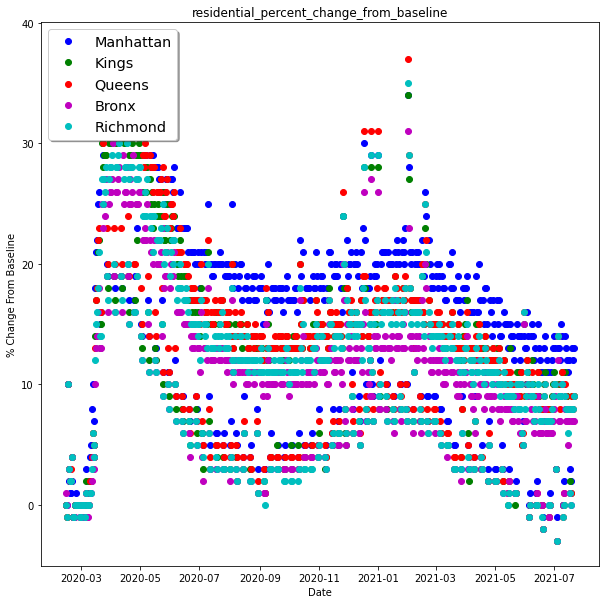

In [5]:
%matplotlib inline 
### WE NEED TO SMOOTH OUT DATA !!!!!!!!!!!!!!!!!!! 

headers = ["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline",
          "parks_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline",
          "residential_percent_change_from_baseline"]

for header in headers: 
    fig, ax = plt.subplots(figsize=(10, 10))
    line1=ax.plot(NYC_df['date'],
        NYC_df[header],'ob', label='Manhattan')

    line2=ax.plot(Kings_df['date'],
        Kings_df[header],'og', label='Kings')

    line3=ax.plot(Queens_df['date'],
        Queens_df[header],'or', label='Queens')
 
    line4=ax.plot(Bronx_df['date'],
        Bronx_df[header],'om', label='Bronx')
    
    line5=ax.plot(Richmond_df['date'],
        Richmond_df[header],'oc', label='Richmond')

    line6=ax.set(xlabel="Date",
       ylabel="% Change From Baseline",
       title=header)
    
    ax.legend(loc='upper left', shadow=True, fontsize='x-large')
    plt.savefig('./graphics/' + header+'.png')
    plt.show()
  
    
    

# COMPARE WITH OTHER BEST PERFORMING COUNTRIES

In [ ]:
####OTHER COUNTRIES RESPONSES

dtaiwan = dfcovid[dfcovid["country_region"]=="Taiwan"]
dtaiwan.head()

dportugal = dfcovid[dfcovid["country_region"]=="Portugal"]
dportugal_madeira = dsss[dsss["sub_region_1"]=="Madeira"]
#dportugal_madeira.head()

#for header in headers: 
#    fig, ax = plt.subplots(figsize=(10, 10))
#    ax.plot(dtaiwan['date'],
#        dtaiwan[header],'ob')
    
#    ax.set(xlabel="Date",
#    ylabel="% Change From Baseline",
#    title=header)
    

# MASK USAGE BY COUNTY

In [56]:
dfmasks = dfmasks.sort_values(["county_fips"],ascending=True)
dfvoting=dfvoting.sort_values(["county_fips"],ascending=True)
#len(dfmasks)
#len(dfvoting)
len(dfmasks)

df_mask_vote = dfvoting.merge(dfmasks, on="county_fips")
#df_mask_vote = df_mask_vote['never'].replace('', np.nan, inplace=True)
#df_mask_vote = df_mask_vote.dropna(subset=['per_gop'], inplace=True)

In [57]:
len(df_mask_vote)
#df_mask_vote[-200:]

3112

TypeError: got an unexpected keyword argument 'rotation'

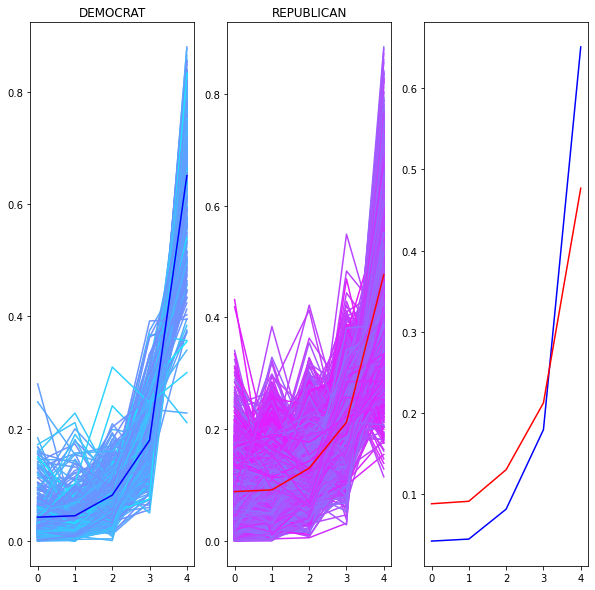

In [96]:
counties = len(df_mask_vote)

never = sum(df_mask_vote['never'])/counties
rarely = sum(df_mask_vote['rarely'])/counties
sometimes = sum(df_mask_vote['sometimes'])/counties
frequently = sum(df_mask_vote['frequently'])/counties
always = sum(df_mask_vote['always'])/counties
#plt.plot([never, rarely, frequently, always], 'o')


dems_mask_vote = df_mask_vote[df_mask_vote["per_gop"]<=0.5]
dems_never_avg = dems_mask_vote["never"].sum() / len(dems_mask_vote)
dems_rarely_avg = dems_mask_vote["rarely"].sum()/ len(dems_mask_vote)
dems_sometimes_avg = dems_mask_vote["sometimes"].sum()/ len(dems_mask_vote)
dems_frequently_avg = dems_mask_vote["frequently"].sum()/ len(dems_mask_vote)
dems_always_avg = dems_mask_vote["always"].sum()/ len(dems_mask_vote)
avgvalues_dem = [dems_never_avg, dems_rarely_avg, dems_sometimes_avg , dems_frequently_avg, dems_always_avg]

reps_mask_vote = df_mask_vote[df_mask_vote["per_gop"]>=0.5]
reps_never_avg = reps_mask_vote["never"].sum() / len(reps_mask_vote)
reps_rarely_avg = reps_mask_vote["rarely"].sum()/ len(reps_mask_vote)
reps_sometimes_avg = reps_mask_vote["sometimes"].sum()/ len(reps_mask_vote)
reps_frequently_avg = reps_mask_vote["frequently"].sum()/ len(reps_mask_vote)
reps_always_avg = reps_mask_vote["always"].sum()/ len(reps_mask_vote)
avgvalues_reps = [reps_never_avg, reps_rarely_avg, reps_sometimes_avg,reps_frequently_avg, reps_always_avg ]

ind=[0,1,2,3,4]
fig, ax = plt.subplots(1,3,figsize=(10, 10))
#for i, county in zip(color_idx, range(0,len(dfmasks),skipby)):
for county in range(0,len(df_mask_vote)-1):
    
    vs = df_mask_vote.iloc[county]
    values = [vs['never'], vs['rarely'], vs['sometimes'], vs['frequently'], vs['always']]
    #print(vs["per_gop"])
    
    if vs["per_gop"]<0.45:
        #print( vs["per_gop"])
        ax[0].plot(ind,
           values, color=plt.cm.cool(vs["per_gop"]))

    if vs["per_gop"]>.55:
        ax[1].plot(ind,
           values, color=plt.cm.cool(vs["per_gop"]))
        
ax[0].plot(ind, avgvalues_dem, '-b' )
ax[1].plot(ind, avgvalues_reps, '-r')        
 
ax[2].plot(ind, avgvalues_dem, '-b', label="dem" )
ax[2].plot(ind, avgvalues_reps, '-r', label="rep" )   

ax[0].set(title='DEMOCRAT')
ax[1].set(title='REPUBLICAN')
ax[0].set_xticks(ind, rotation='vertical')
ax[0].set_xticklabels(['Never', 'Rarely','Sometimes','Frequently','Always'])
ax[1].set_xticks(ind)
ax[1].set_xticklabels(['Never', 'Rarely','Sometimes','Frequently','Always'])
ax[2].set_xticks(ind)
ax[2].set_xticklabels(['Never', 'Rarely','Sometimes','Frequently','Always'])
ax[2].legend(loc='upper left', shadow=True, fontsize='x-large')
plt.savefig('./graphics/maskusage_county.png')
plt.show()


<h1> ELECTION RESULTS FOLIUM </h1>

The folium here is a placeholder for the mobility data. Electron results will be used to attempt to predict mask usage by county

In [204]:
#### 2020 ELECTION RESULTS BY COUNTY FOR FOLIUM MAPPING
#### 2020 ELECTION RESULTS BY COUNTY FOR FOLIUM MAPPING
### we want to change this to MOBILITY DATA-TIME once everything functions !!!!!!!!!!!

#states = (dfvoting['county_fips'])
states = (dfvoting['GEO_ID'])
states = states.reset_index(drop=True)
#print(states)

#result = {}
for state in states:
    #print(state_year)
    state_year = dfvoting[(dfvoting.GEO_ID == state)]
    #print(state_year)
    dem = state_year['votes_dem'].iloc[0]
    #print(dem)
    
    rep = state_year['votes_gop'] #.iloc[0]

    result[state]={'dem':dem, 'rep':rep}
     

In [253]:
### TRANSFORM ELECTION RESULTS INTO NESTED LOOP

def county_style(county,function=False):
    """
    Returns the style for a state in a given year
    """
    
    try:
        county_results = result[county]

        dems=county_results['dem'].astype(int)
        reps= county_results['rep'].astype(int)
        aa = (result[county]['dem'] >= result[county]['rep'])
        #print(aa.iloc[0])
        #Set state colour
        if aa.iloc[0] == True:
            color = '#4f7bff' #blue
            #print(1)
        
        else:
            color = '#ff5b4f' #red
            #print(0)
    except: 
        color = '#FFFFFF' #white
        
        
    #Set state style
    if function == False:
        # Format for style_dictionary
        county_style = {
            'opacity': 1,
            'color': color,
        } 
    else:
        # Format for style_function
        county_style = {
             'fillOpacity': 1,
             'weight': 1,
             'fillColor': color,
             'color': '#000000'}    
  
    return county_style
        
def style_function(feature):
    """
    style_function used by the GeoJson folium function
    """

    county = feature['properties']['GEO_ID']
    style = county_style(county,function=True)
    
    return style

In [315]:
### FOLIUM MAP  BY COUNTY  (ELECTION RESULTS)

us_shape = gpd.read_file('./geojson/gz_2010_us_050_00_500k.shp')
us_shape.head()
us_shape = us_shape[['GEO_ID','geometry']]
#county_geo = 'gz_2010_us_050_00_20m.json'

m = folium.Map(location=[50.77500, -100],zoom_start=3) 
#choropleth = folium.GeoJson(json.load(open(county_geo, encoding='ISO-8859-1')))
choropleth = folium.GeoJson(data = us_shape.to_json(), style_function=style_function)
m.add_child(choropleth)

#m.save("./graphics/election_county_folium.png")

import io
from PIL import Image

img_data = m._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('image.png')

WebDriverException: Message: 'geckodriver' executable needs to be in PATH. 


The next steps are:

(1) to generate a folium map of the mobility results by county (after the data is smoothed), with a sliding timescale


(2) develop a machine learning algorithm to attempt to either predict election voting stats by county with mask tendancy data, or the vice versa. 